# Context
---

## Data Definitions
---

The water_potability.csv file contains water quality metrics for 3276 different bodies of water.

1. __pH value__
 * pH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. The World Health Organization (WHO) recommends a pH of 6.5 to 8.5.

2. __Hardness__
  * Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water.

3. __Solids__
  * Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produce unwanted taste and diluted color in appearance of water. A desirable limit for total dissolved solids is 500 milligrams per liter (mg/L) and maximum limit is 1000mg/L which prescribed for drinking purpose.

4. __Chloramines__
  * Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4mg/L or 4 parts per million (ppm) are considered safe in drinking water.

5. __Sulfate__
  * Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. Sulfate concentration in seawater is about 2,700mg/L. It ranges from 3 to 30mg/L in most freshwater supplies, although much higher concentrations (1000mg/L) are found in some geographic locations.

6. __Conductivity__
  * Pure water is not a good conductor of electric current. The amount of dissolved solids in water determines the electrical conductivity (EC) which measures the ionic process of a solution that enables it to transmit current. According to WHO standards, the EC value of water should not exceeded 400μS/cm.

7. __Organic_carbon__
  * Total organic carbon (TOC) in source waters comes from decaying natural organic matter as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to the U.S. Environmental Protection Agency (EPA) there should be less than 2mg/L of TOC in treated/drinking water.

8. __Trihalomethanes__
  * Trihalomethanes (THM) are chemicals which may be found in water treated with chlorine. The concentration of THM in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80ppm is considered safe in drinking water.

9. __Turbidity__
  * The turbidity of water depends on the quantity of solid matter present in a suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter.

10. __Potability__
  * Water's potability indicates if the water is safe for human consumption. [1]


[1]: https://www.kaggle.com/adityakadiwal/water-potability

---

# Preprocessing

In [57]:
# Imports
import graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree 


In [20]:
plt.figure(figsize=(10,10))
df = pd.read_csv("/content/drive/MyDrive/Fall 2021/CS 634/Project/water_potability.csv")

In [21]:
df.columns = df.columns.str.lower()

In [22]:
df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


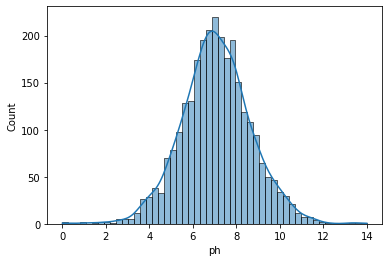

In [23]:
sns.histplot(df.ph,kde = True)

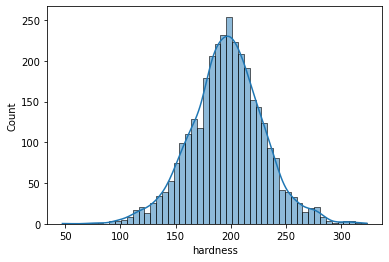

In [24]:
sns.histplot(df.hardness,kde = True)

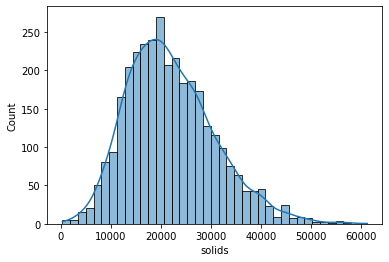

In [25]:
sns.histplot(df.solids,kde = True)

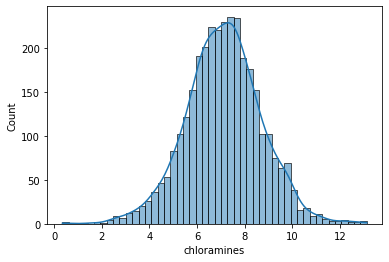

In [26]:
sns.histplot(df.chloramines,kde = True)

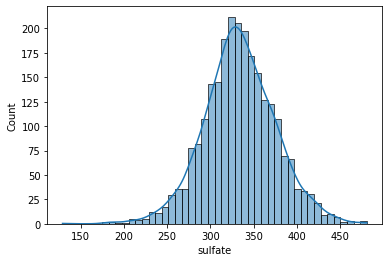

In [27]:
sns.histplot(df.sulfate,kde = True)

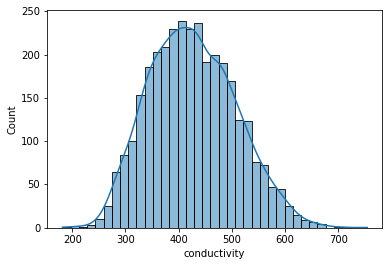

In [28]:
sns.histplot(df.conductivity,kde = True)

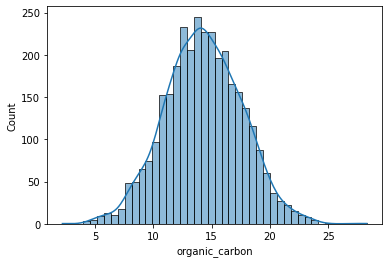

In [29]:
sns.histplot(df.organic_carbon,kde = True)

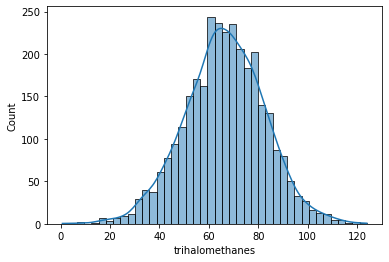

In [30]:
sns.histplot(df.trihalomethanes,kde = True)

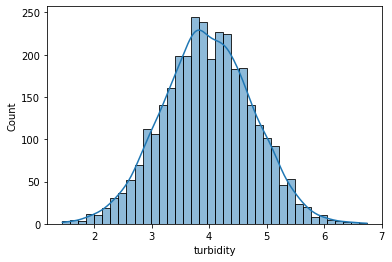

In [31]:
sns.histplot(df.turbidity,kde = True)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [33]:
df.isnull().sum()

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64

In [34]:
df[df['ph'].isnull()]

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [35]:
df[df['sulfate'].isnull()]

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [36]:
df[df['trihalomethanes'].isnull()]

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [37]:
df['ph']=df['ph'].fillna(df.groupby(['potability'])['ph'].transform('mean'))
df['sulfate']=df['sulfate'].fillna(df.groupby(['potability'])['sulfate'].transform('mean'))
df['trihalomethanes']=df['trihalomethanes'].fillna(df.groupby(['potability'])['trihalomethanes'].transform('mean'))

In [38]:
df.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

In [40]:
sc = StandardScaler()
df_sc = sc.fit_transform(df.iloc[:, :-1])
df_scaled = pd.DataFrame(df_sc, columns = df.columns[:-1])
df_scaled['potability'] = df['potability']

In [41]:
df_scaled.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,0.003078,0.259195,-0.139471,0.112415,0.961017,1.708954,-1.180651,1.306187,-1.286298,0
1,-2.289378,-2.036414,-0.385987,-0.307694,0.021560,2.062575,0.270597,-0.638440,0.684218,0
2,0.692826,0.847665,-0.240047,1.360594,0.021560,-0.094032,0.781117,0.001549,-1.167365,0
3,0.840908,0.547651,0.000493,0.592008,0.639206,-0.778830,1.255134,2.152910,0.848412,0
4,1.368526,-0.464429,-0.460249,-0.363698,-0.654379,-0.343939,-0.824357,-2.181556,0.138786,0


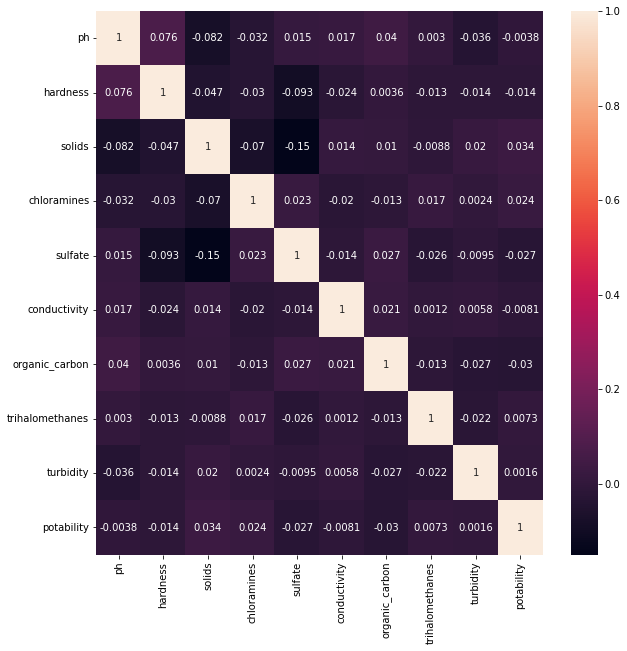

In [46]:
sns.heatmap(df_scaled.corr(),annot=True)

It is apparent that there is little correlation between features and therefore all will be utilized for the model.

# Modeling
---

## K Nearest Neighbors

In [49]:
x = df_scaled.drop("potability", axis=1)
y = df_scaled.potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.2, random_state=68)

In [52]:
for n in range(2,10):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print("Accuracy for "+str(n)+" neighbors:",metrics.accuracy_score(y_test, y_pred))

Accuracy for 2: 0.6310975609756098
Accuracy for 3: 0.6128048780487805
Accuracy for 4: 0.6310975609756098
Accuracy for 5: 0.6158536585365854
Accuracy for 6: 0.6371951219512195
Accuracy for 7: 0.635670731707317
Accuracy for 8: 0.6280487804878049
Accuracy for 9: 0.6280487804878049


<br></br>
## Decision Trees

In [67]:
model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, class_weight=None, min_samples_leaf=200, random_state=37)
clf = model.fit(X_train, y_train)
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)

In [71]:
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('Leaves: ', clf.tree_.n_leaves)
print('Features: ', clf.n_features_in_)

Classes:  [0 1]
Tree Depth:  5
Leaves:  11
Features:  9


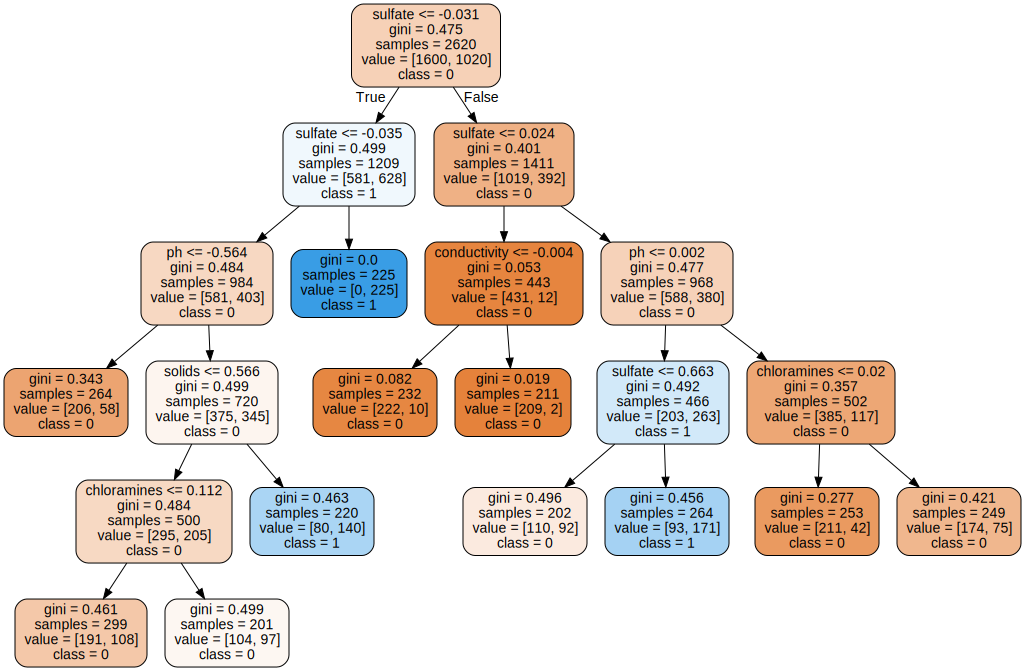

In [69]:
tree_data = tree.export_graphviz(clf, out_file=None, 
                            feature_names=x.columns, 
                            class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                            filled=True, 
                            rounded=True, 
                            ) 
graph = graphviz.Source(tree_data)
graph

In [64]:
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)

Accuracy Score:  0.7545731707317073


# Conclusion
---

My two models, KNN and a Decision Tree, with accuracy scores of ~63% and ~75% respectively yield promising results but the decision tree yielded a slightly higher accuracy.